# Initialiazation Packages

In [1]:
using LinearAlgebra
using PyPlot
using PyCall
using LaTeXStrings
using QuantumToolbox
using DelimitedFiles, NLsolve
using Random, Distributions, Dates, Polynomials, StatsBase 
using JLD

In [2]:
#using Pkg
#Pkg.activate("..")

include("../src/Classical_2KPOs_functions.jl")
using .Classical_KPOs

## Lyapunov exponent of the classical trajectories

In [3]:
function Cluster_visualizationγ(j)
    k = j
    Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = 0., 1., 0., 5., 0., 1., 0., 5.
    ns_job = [1, 50, 101]
    λs_p = [[Float64[]] for i in 1:3]
    λmean_p = [Float64[] for i in 1:3]
    Energies = [Float64[] for i in 1:3]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];
    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 100
    Es = range(cE[1],0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")[" λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")[" λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .- cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    Es = range(0.,500.0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .-  cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    #xlim(0,200)
    
    #savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov/Lyapunov_γ_$(ps[j]).png")
    #close()
end

Cluster_visualizationγ (generic function with 1 method)

In [4]:
function Cluster_visualizationγ2(j)
    k = j
    Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = 0., 1., 0., 5., 0., 1., 0., 5.
    ns_job = [1, 50, 101]
    λs_p = [[Float64[]] for i in 1:3]
    λmean_p = [Float64[] for i in 1:3]
    Energies = [Float64[] for i in 1:3]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];
    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 100
    Es = range(cE[1],0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .- cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    Es = range(0.,500.0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .-  cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    #xlim(0,200)
    
    #savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov/Lyapunov_γ_$(ps[j]).png")
    #close()
end

Cluster_visualizationγ2 (generic function with 1 method)

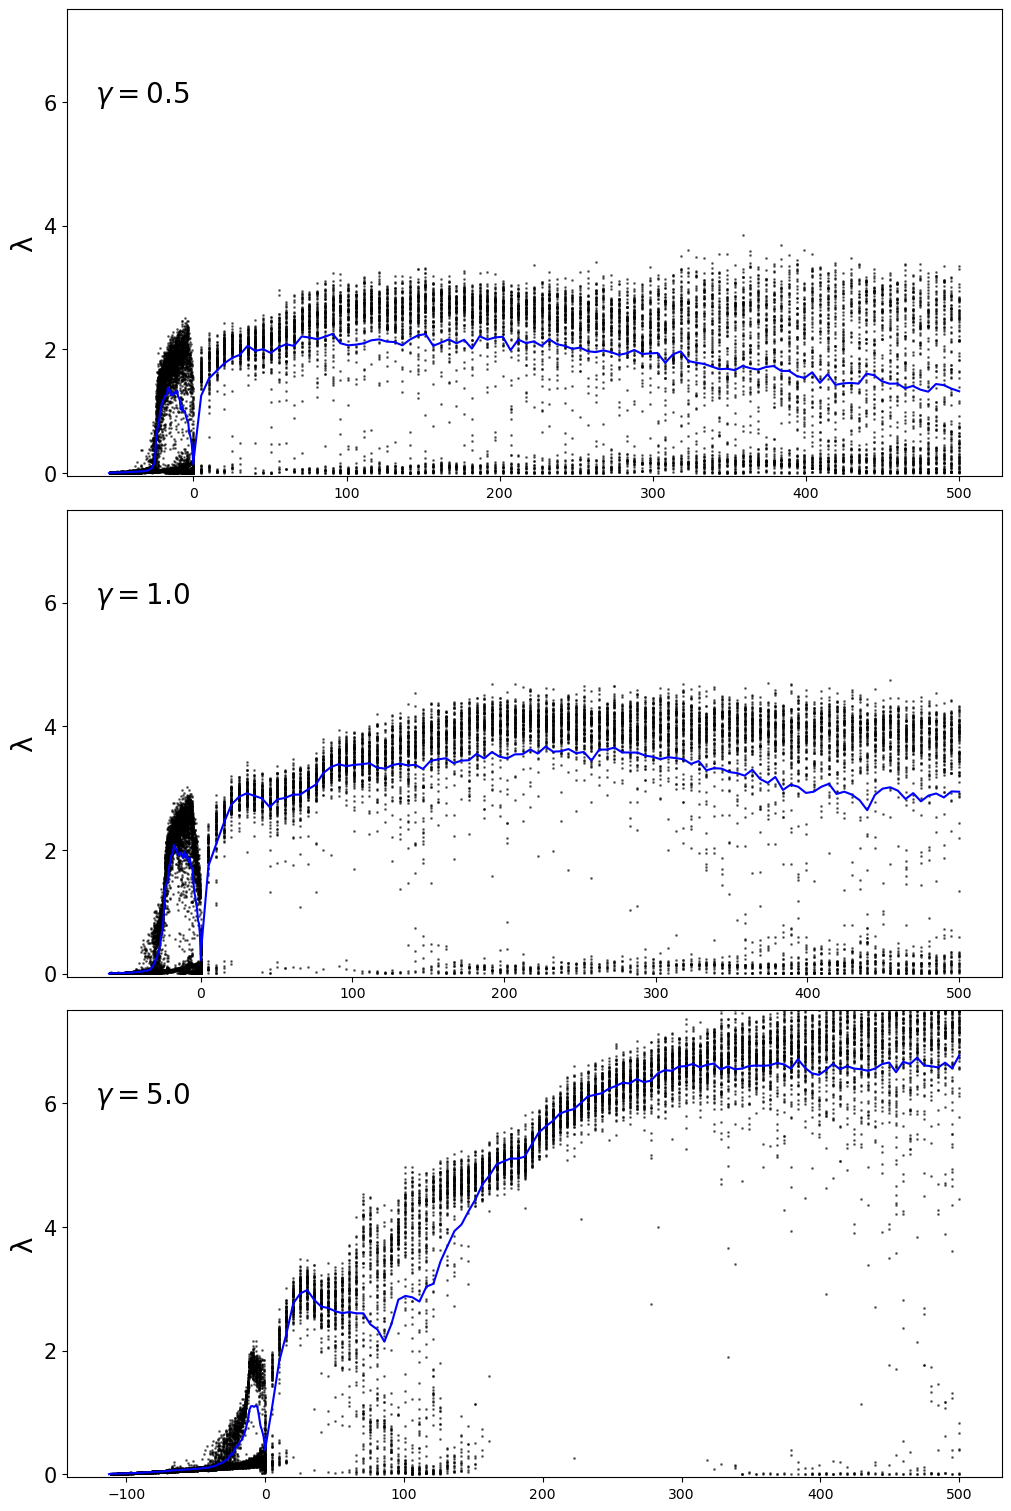

In [ ]:
fig = figure(figsize=(10,15), layout="constrained");
gs = fig.add_gridspec(3,1);
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)
ps = [0.5, 1., 5.]
for k in 1:3
    ax = fig.add_subplot(element(k-1,0))
    Cluster_visualizationγ(k)
    #if k ==3
    #    xlabel("E", fontsize = 20)
        #xticks([-120, -80, -40, 0], fontsize=15)
    #else
    #    xticks([])
    #end
    ax.text(.03, 0.85, L"γ = %$(ps[k])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    ylabel("λ", fontsize = 20)
    yticks([0, 2, 4,6], fontsize=15)
    #xlim(0, 3000)
    ylim(-.05, 7.5)
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_E_γ_big2.png")

## Quantum Classical 

-51.005
γ = 0.1
data_miss = Any[]
-60.5
γ = 1.0
data_miss = Any[]
-112.5
γ = 5.0
data_miss = Any[]


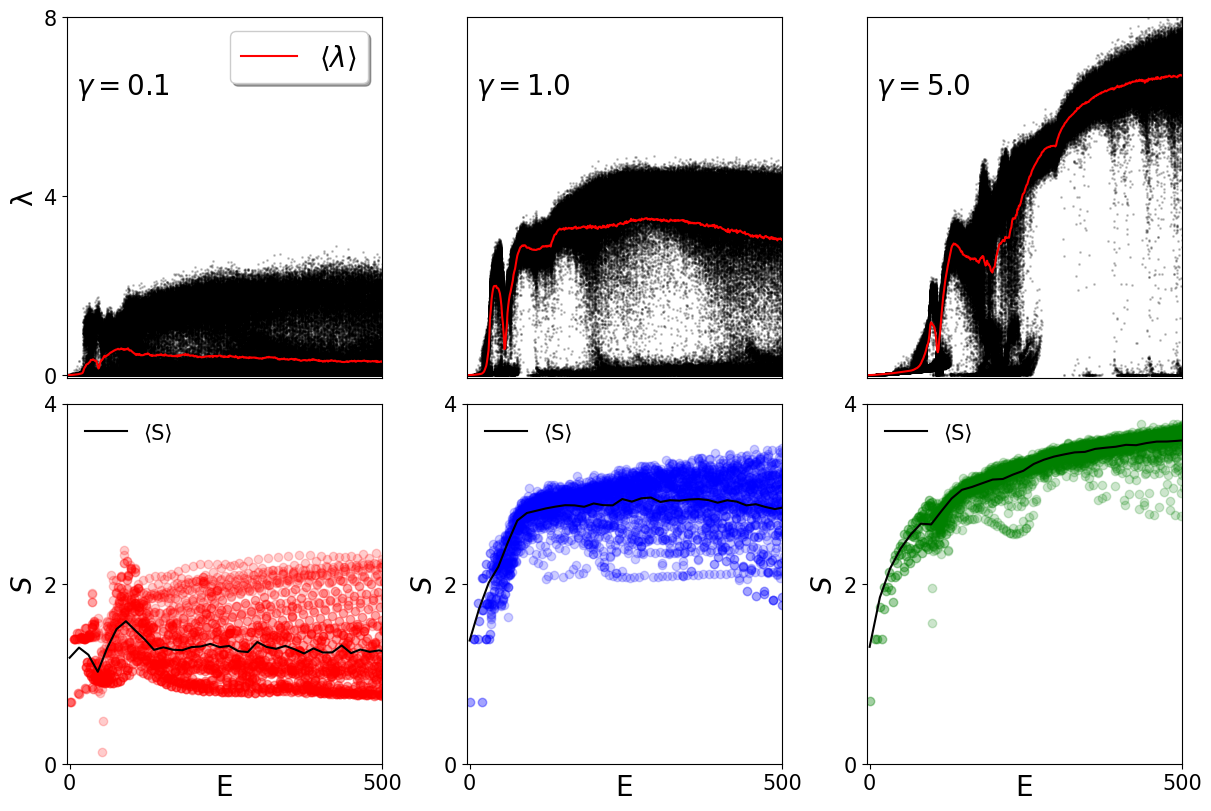

In [8]:
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ = 0., 1., 0., 5., 0., 1., 0., 5., 1.
ICs= 1000
Neff= 3


fig = figure(figsize=(12,8), layout="constrained");
gs = fig.add_gridspec(2,3); 
element(i,j) = get(gs, (i,j)); # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j);
xx_lim = 500

for j in 1:3
    ax = fig.add_subplot(element(0,j-1))
    ps = [0.1, 1.,5.]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];  

    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 500
    Es1 = range(cE[1],600+cE[1], length=n_E)
    println( cE[1] )
    Energies = Es1 .- cE[1] 
    λs = [Float64[] for i in 1:n_E]
    λ_mean = zeros(n_E)
    data_miss= []
    for job in 1:100
        try
            λ_mean[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Mean_Lyapunov_Energies_$(p)_job_$(job)__ICs_$(ICs).jld")["λ_mean"][(5*(job-1) + 1):5*job]
            λs[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Lyapunov_Energies_$(p)_job_$(job)_ICs_$(ICs).jld")["λs"][(5*(job-1) + 1):5*job]
        catch
            #println("Missing job $(job)")
            push!(data_miss, job)
        end    
    end
    println("γ = $(ps[j])")
    println("data_miss = $(data_miss)")
    #println(length(data_miss))

    #pltos
    plot(Energies, λ_mean, "-", color="red", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs)
        scatter(range(Energies[i], Energies[i], length=length(λs[i])), λs[i], color="black", alpha=0.2,s=1);
    end
    ax.text(.03, 0.85, L"γ = %$(ps[j])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    if j ==1
        legend(fontsize=20, shadow=true, loc = "upper right");
    end
    xticks([])
    if j ==1
        ylabel("λ", fontsize = 20)
        yticks([0, 4, 8], fontsize=15)
        #xlim(0, 130)
        #ylim(-.05, 3.5)
    else
        yticks([])
    end
    xlim(-0.05, xx_lim)
    ylim(-.05, 8.0)

    ax = fig.add_subplot(element(1,j-1))
    colors_ = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "olive", "cyan"];
    markers_ = ["o", "v", "s", "D", "^", "<", ">", "p", "*", "h"];
                            
    
    Entropies = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/data/Entropy/Entropy_p_$(p)_Neff_$(Neff).jld")["Entropies"]
    E = (load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/data/Entropy/Energies_p_$(p)_Neff_$(Neff).jld")["E"]) ./ Neff^2
    mean_S = Float64[]
    div_len = 40
    intv_E =  range(minimum(E),maximum(E)+1,length=div_len)
    for i in 1: (div_len-1)
        index = findall(x -> x >= intv_E[i] && x < intv_E[i+1], E)
        push!(mean_S, mean(Entropies[index]))
    end

    plot(E .- E[1], Entropies, "o", color=colors_[j], alpha = 0.2)
    plot(intv_E[1:end-1] .- E[1] , mean_S, color="black", label="⟨S⟩")
    xlim(-5, xx_lim)
    legend(frameon=false,fontsize=15, shadow=true, loc = "upper left")
    ylim(0.3,4)
    ylabel(L"S", fontsize=20)
    xlabel("E", fontsize=20,labelpad=-15)
    xticks([0,xx_lim],fontsize=15)
    yticks([0,2,4],fontsize=15)
    
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_Energy.png")


-60.5
γ = 1.0
data_miss = Any[]


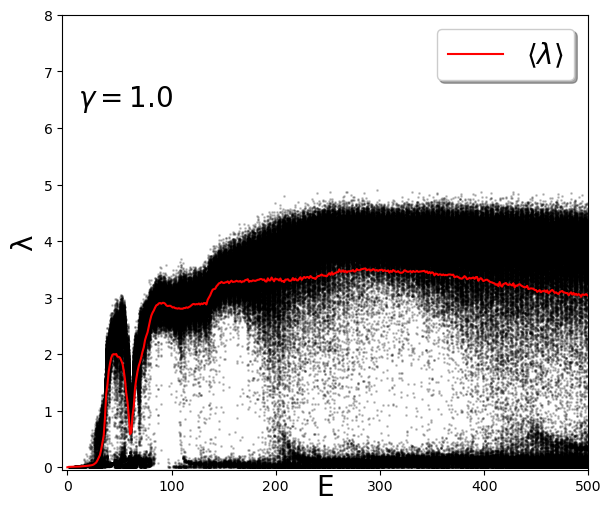

In [4]:
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ = 0., 1., 0., 5., 0., 1., 0., 5., 1.
ICs= 1000

fig = figure(figsize=(6,5), layout="constrained");
gs = fig.add_gridspec(1,1); 
element(i,j) = get(gs, (i,j)); # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j);
xx_lim = 500

for j in 1:1
    ax = fig.add_subplot(element(0,j-1))
    ps = [1.]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];  

    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 500
    Es1 = range(cE[1],600+cE[1], length=n_E)
    println( cE[1] )
    Energies = Es1 .- cE[1] 
    λs = [Float64[] for i in 1:n_E]
    λ_mean = zeros(n_E)
    data_miss= []
    for job in 1:100
        try
            λ_mean[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Mean_Lyapunov_Energies_$(p)_job_$(job)__ICs_$(ICs).jld")["λ_mean"][(5*(job-1) + 1):5*job]
            λs[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Lyapunov_Energies_$(p)_job_$(job)_ICs_$(ICs).jld")["λs"][(5*(job-1) + 1):5*job]
        catch
            #println("Missing job $(job)")
            push!(data_miss, job)
        end    
    end
    println("γ = $(ps[j])")
    println("data_miss = $(data_miss)")
    #println(length(data_miss))

    #pltos
    plot(Energies, λ_mean, "-", color="red", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs)
        scatter(range(Energies[i], Energies[i], length=length(λs[i])), λs[i], color="black", alpha=0.2,s=1);
    end
    ax.text(.03, 0.85, L"γ = %$(ps[j])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    if j ==1
        legend(fontsize=20, shadow=true, loc = "upper right");
    end
    if j ==1
        ylabel("λ", fontsize = 20)
        #yticks([0, 4, 8], fontsize=15)
        #xlim(0, 130)
        #ylim(-.05, 3.5)
    else
        yticks([])
    end
    xlim(-0.05, xx_lim)
    ylim(-.05, 8.0)

    xlim(-5, xx_lim)
    xlabel("E", fontsize=20,labelpad=-15)
    #xticks([0,xx_lim],fontsize=15)
    
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_Energy.png")
